1) Veri dosyalarını dataframe olarak okuyup kaydediniz.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_altin = pd.read_excel('altin.xlsx')
df_bronz = pd.read_excel('bronz.xlsx')
df_gumus = pd.read_excel('gumus.xlsx')
df_igi = pd.read_excel('insani_gelisim_indeksi.xlsx')
df_altin

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0
...,...,...,...
131,SEN,Senegal,NaN
132,SUD,Sudan,NaN
133,TGA,Tonga,NaN
134,BDI,Burundi,1.0


2) Altın, gümüş ya da bronz madalya dosyalarının en az birinde adı geçen ülkelerin aldıkları altın, gümüş ve bronze madalya sayılarını df_madalya adını verdiğiniz tek bir dataframede birleştiriniz. 

In [ ]:
df_madalya1 = pd.merge(df_altin,df_gumus,how='outer',on=['Country'])
df_madalya = pd.merge(df_madalya1,df_bronz,how='outer',on='Country')
df_madalya

,NOC_x,Country,Total_x,NOC_y,Total_y,NOC,Total
0,USA,United States,2088.0,USA,1195.0,USA,1052.0
1,URS,Soviet Union,838.0,URS,627.0,URS,584.0
2,GBR,United Kingdom,498.0,GBR,591.0,GBR,505.0
3,FRA,France,378.0,FRA,461.0,FRA,475.0
4,GER,Germany,407.0,GER,350.0,GER,454.0
...,...,...,...,...,...,...,...
131,SEN,Senegal,NaN,SEN,1.0,SEN,NaN
132,SUD,Sudan,NaN,SUD,1.0,SUD,NaN
133,TGA,Tonga,NaN,TGA,1.0,TGA,NaN
134,BDI,Burundi,1.0,BDI,NaN,BDI,NaN


3) df_madalya’da üç adet sütun bilgisi yer almalıdır ve sütun isimleri sırası ile “Ulke”, “Altin”, “Gumus”, “Bronz” şeklinde olmalıdır. 

In [ ]:
df_madalya.rename(columns={'Total':'Bronz'},inplace=True)
df_madalya.rename(columns={'Total_x':'Altin'},inplace=True)
df_madalya.rename(columns={'Total_y':'Gumus'},inplace=True)
df_madalya.rename(columns={'Country':'Ulke'},inplace=True)
df_madalya = df_madalya.drop('NOC_x',axis=1)
df_madalya = df_madalya.drop('NOC_y',axis=1)
df_madalya = df_madalya.drop('NOC',axis=1)
df_madalya


,Ulke,Altin,Gumus,Bronz
0,United States,2088.0,1195.0,1052.0
1,Soviet Union,838.0,627.0,584.0
2,United Kingdom,498.0,591.0,505.0
3,France,378.0,461.0,475.0
4,Germany,407.0,350.0,454.0
...,...,...,...,...
131,Senegal,NaN,1.0,NaN
132,Sudan,NaN,1.0,NaN
133,Tonga,NaN,1.0,NaN
134,Burundi,1.0,NaN,NaN


4) df_madalya’da NaN olan değerleri 0 yapınız.

In [ ]:
df_madalya.fillna(0,inplace=True)
df_madalya

,Ulke,Altin,Gumus,Bronz
0,United States,2088.0,1195.0,1052.0
1,Soviet Union,838.0,627.0,584.0
2,United Kingdom,498.0,591.0,505.0
3,France,378.0,461.0,475.0
4,Germany,407.0,350.0,454.0
...,...,...,...,...
131,Senegal,0.0,1.0,0.0
132,Sudan,0.0,1.0,0.0
133,Tonga,0.0,1.0,0.0
134,Burundi,1.0,0.0,0.0


5) df_madalya ‘da yer alan her ülke için Altın, Gumus ve Bronz madalya sayılarını toplayanız ve bu toplamı  “Toplam” adındaki yeni bir sütunda tutunuz. 

In [ ]:
col_agb = ['Altin','Gumus','Bronz']
df_madalya['Toplam'] = df_madalya[col_agb].sum(axis=1)
df_madalya

,Ulke,Altin,Gumus,Bronz,Toplam
0,United States,2088.0,1195.0,1052.0,4335.0
1,Soviet Union,838.0,627.0,584.0,2049.0
2,United Kingdom,498.0,591.0,505.0,1594.0
3,France,378.0,461.0,475.0,1314.0
4,Germany,407.0,350.0,454.0,1211.0
...,...,...,...,...,...
131,Senegal,0.0,1.0,0.0,1.0
132,Sudan,0.0,1.0,0.0,1.0
133,Tonga,0.0,1.0,0.0,1.0
134,Burundi,1.0,0.0,0.0,1.0


6) df_madalya ‘da yer alan ülkelerin Altın, Gumus, Bronz, Toplam madalya sayılarını ve 2008 yılı insani gelişim indeks bilgilerini içeren df_ulkeler adında yeni bir dataframe oluşturunuz. 

7) df_ulkeler’de beş adet sütun bilgisi yer almalıdır ve sütun isimleri sırası ile “Ulke”, “Altın”, “Gumus”, “Bronz”, “Toplam” ve “2008_Insani gelisim indeksi” şeklinde olmalıdır. 

In [ ]:
df_igi.rename(columns={'Country':'Ulke'},inplace=True)
df_igi.rename(columns={'2008_Human Development Index':'2008_Insani gelisim indeksi'},inplace=True)
df_igi

,Ulke,2008_Insani gelisim indeksi
0,Afghanistan,0.447
1,Albania,0.728
2,Algeria,0.702
3,Andorra,0.840
4,Angola,0.501
...,...,...
190,East Asia and the Pacific,0.672
191,Europe and Central Asia,0.723
192,Latin America and the Caribbean,0.726
193,South Asia,0.569


In [ ]:
df_ulkeler = pd.merge(df_madalya,df_igi,how='outer',on='Ulke')
df_ulkeler

,Ulke,Altin,Gumus,Bronz,Toplam,2008_Insani gelisim indeksi
0,United States,2088.0,1195.0,1052.0,4335.0,0.911
1,Soviet Union,838.0,627.0,584.0,2049.0,NaN
2,United Kingdom,498.0,591.0,505.0,1594.0,0.903
3,France,378.0,461.0,475.0,1314.0,0.875
4,Germany,407.0,350.0,454.0,1211.0,0.924
...,...,...,...,...,...,...
210,East Asia and the Pacific,NaN,NaN,NaN,NaN,0.672
211,Europe and Central Asia,NaN,NaN,NaN,NaN,0.723
212,Latin America and the Caribbean,NaN,NaN,NaN,NaN,0.726
213,South Asia,NaN,NaN,NaN,NaN,0.569


8) df_ulkeler ‘i kullanarak ülkelerin toplam madalya sayısına ve insani gelişim indeksine ait dağılım (scatter, serpme) grafiğini çizdiriniz.

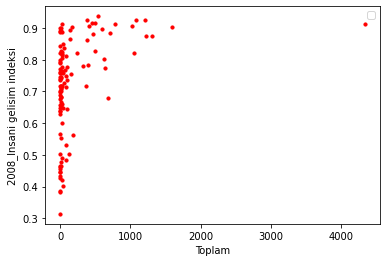

In [ ]:
plt.scatter(df_ulkeler['Toplam'],df_ulkeler['2008_Insani gelisim indeksi'],marker="o",s=10,color='red')
plt.xlabel('Toplam')
plt.ylabel('2008_Insani gelisim indeksi')
plt.legend()

9) İnsani gelişim indeksi 0.9 ve üzeri olan ülkelere ait altın madalya ve toplam madalya sayılarını gösteren sütun grafiğini (bar chart) çizdiriniz.

In [38]:
df_9 = df_ulkeler.loc[df_ulkeler['2008_Insani gelisim indeksi']>=0.9]
df_9
#df_9 = df_9.drop('Gumus',axis=1)
#df_9 = df_9.drop('Bronz',axis=1)
#df_9 = df_9.drop('2008_Insani gelisim indeksi',axis=1)

,Ulke,Altin,Gumus,Bronz,Toplam,2008_Insani gelisim indeksi
0,United States,2088.0,1195.0,1052.0,4335.0,0.911
2,United Kingdom,498.0,591.0,505.0,1594.0,0.903
4,Germany,407.0,350.0,454.0,1211.0,0.924
5,Australia,293.0,369.0,413.0,1075.0,0.926
8,Sweden,347.0,349.0,325.0,1021.0,0.907
9,Netherlands,212.0,250.0,320.0,782.0,0.913
16,Finland,124.0,118.0,209.0,451.0,0.917
20,Denmark,147.0,192.0,152.0,491.0,0.917
21,Belgium,91.0,167.0,150.0,408.0,0.906
22,Norway,194.0,199.0,144.0,537.0,0.937


Text(0.5, 0, 'Madalya')

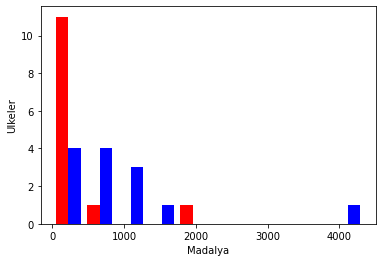

In [44]:
plt.hist([df_9.Altin,df_9.Toplam],histtype='bar',color=['red','blue'])

plt.ylabel("Ulkeler")
plt.xlabel("Madalya")